### 1 Import libraries and generate data

In [1]:
import sys
from class_vis import prettyPicture, output_image
from prep_terrain_data import makeTerrainData
from time import time

%matplotlib inline 
import matplotlib.pyplot as plt


import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()

### 2 Classifier Algorhithms (Classes 1-3)

#### 2.1 Naive Bayes

In [6]:
from classifyNB import classify_nb, NBAccuracy

In [7]:
clf = classify_nb(features_train, labels_train)

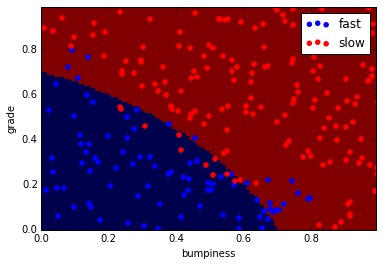

In [8]:
prettyPicture(clf, features_test, labels_test)
#output_image("testTD.png", "png", open("test.png", "rb").read())

In [9]:
print NBAccuracy(features_train, labels_train, features_test, labels_test)

0.884


#### 2.2 SVM

In [10]:
from classifySVM import classify_svm, SVMAccuracy

In [11]:
clf = classify_svm(features_train, labels_train)

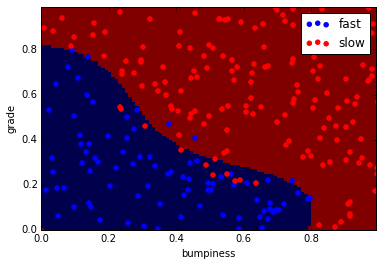

In [12]:
prettyPicture(clf, features_test, labels_test)
#output_image("testTD.png", "png", open("test.png", "rb").read())

In [13]:
print SVMAccuracy(features_train, labels_train, features_test, labels_test)

0.932


#### 2.3 Decision tree

In [21]:
from classifyDT import classify_dt, DTAccuracy

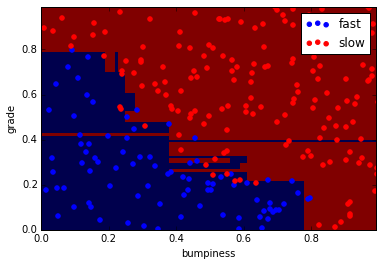

In [23]:
prettyPicture(clf, features_test, labels_test)
#output_image("testTD.png", "png", open("test.png", "rb").read())

In [5]:
print DTAccuracy(features_train, labels_train, features_test, labels_test)

0.908


#### 2.4 Pick your own algorhithm: Random Forest

In [2]:
from classifyRF import classify_rf, RFAccuracy

In [15]:
clf = classify_rf(features_train, labels_train)

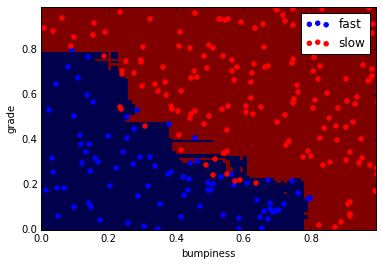

In [16]:
prettyPicture(clf, features_test, labels_test)
#output_image("testTD.png", "png", open("test.png", "rb").read())

In [32]:
print RFAccuracy(features_train, labels_train, features_test, labels_test)

0.936


### 3 Continuous Predictions: Regression

#### Lesson 6

In [5]:
from ages_net_worths import ageNetWorthData
from studentRegression import studentReg

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()

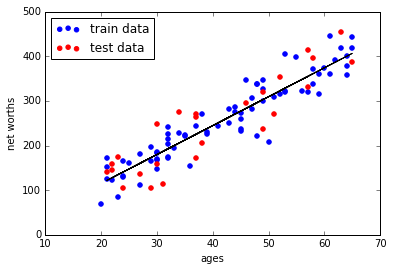

In [32]:
reg = studentReg(ages_train, net_worths_train)

plt.scatter(ages_train, net_worths_train, color="b", label="train data")
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
plt.plot(ages_test, reg.predict(ages_test), color="black")
plt.legend(loc=2)
plt.xlabel("ages")
plt.ylabel("net worths")
plt.show()

In [30]:
print "Katie's net worth prediction:", reg.predict([[27]])[0][0]
print "Slope:", reg.coef_[0][0]
print "Intercept:", reg.intercept_[0]
print "r-squared for training data:", reg.score(ages_train, net_worths_train)
print "r-squared for test data:", reg.score(ages_test, net_worths_test)

Katie's net worth prediction: 160.432054531
Slope: 6.47354954958
Intercept: -14.3537833078
r-squared for training data: 0.874588235822
r-squared for test data: 0.812365729231


#### Mini-Project 

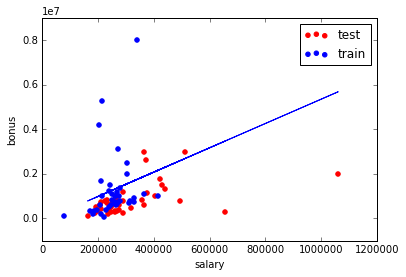

Coefficient: 5.44814028881
Intercept: -102360.543294
Comparing regression predictions with target values using *training data* (i.e., how not to do it):  0.0455091926995
Comparing regression predictions with target values using *test data*:  -1.48499241737


In [59]:
import sys
import pickle
sys.path.append("../ud120-files/tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../ud120-files/final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
reg = studentReg(feature_train, target_train)



### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

print "Coefficient:", reg.coef_[0]
print "Intercept:", reg.intercept_

print "Comparing regression predictions with target values using *training data* (i.e., how not to do it): ", \
        reg.score(feature_train, target_train)

print "Comparing regression predictions with target values using *test data*: ", \
        reg.score(feature_test, target_test)

#### Predicting based on long_term_incentive instead

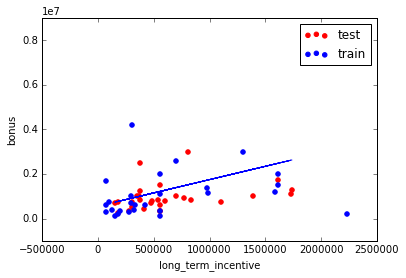

Coefficient: 1.19214698985
Intercept: 554478.756215
Comparing regression predictions with target values using *training data* (i.e., how not to do it):  0.217085971258
Comparing regression predictions with target values using *test data*:  -0.59271289995


In [58]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
reg2 = studentReg(feature_train, target_train)



### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg2.predict(feature_test) )
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

print "Coefficient:", reg2.coef_[0]
print "Intercept:", reg2.intercept_

print "Comparing regression predictions with target values using *training data* (i.e., how not to do it): ", \
        reg2.score(feature_train, target_train)

print "Comparing regression predictions with target values using *test data*: ", \
        reg2.score(feature_test, target_test)

#### Effect of Outliers

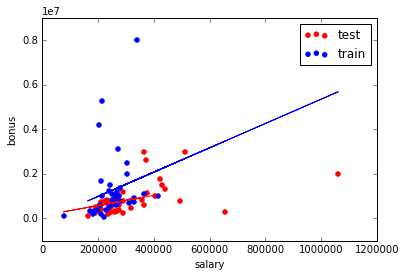

Coefficient: 2.27410114127
Intercept: 124444.388866
Comparing regression predictions with target values using *training data*:  -0.123597985403
Comparing regression predictions with target values using *test data*:  0.251488150398


In [66]:
import sys
import pickle
sys.path.append("../ud120-files/tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../ud120-files/final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
reg = studentReg(feature_train, target_train)



### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
### Add regression for test dataset
reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="r")
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

## Output for regression with test data set
print "Coefficient:", reg.coef_[0]
print "Intercept:", reg.intercept_

print "Comparing regression predictions with target values using *training data*: ", \
        reg.score(feature_train, target_train)

print "Comparing regression predictions with target values using *test data*: ", \
        reg.score(feature_test, target_test)